### Author: Tejaswini Patil
### Reg No: 20MAI0044
### Deep Learning CSE6037-Lab2

### Activity 2 - Write a code to filter the given image using the following size of the filters
***1: filter size(3,3) and (5,5)\
2: filter size(3,3) and (5,5),stride=2\
3: filter size(3,3) and (5,5),stride=1,zero-padding\
4: Calculate the metric: entropy***

In [1]:
# Importing Necessary Libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

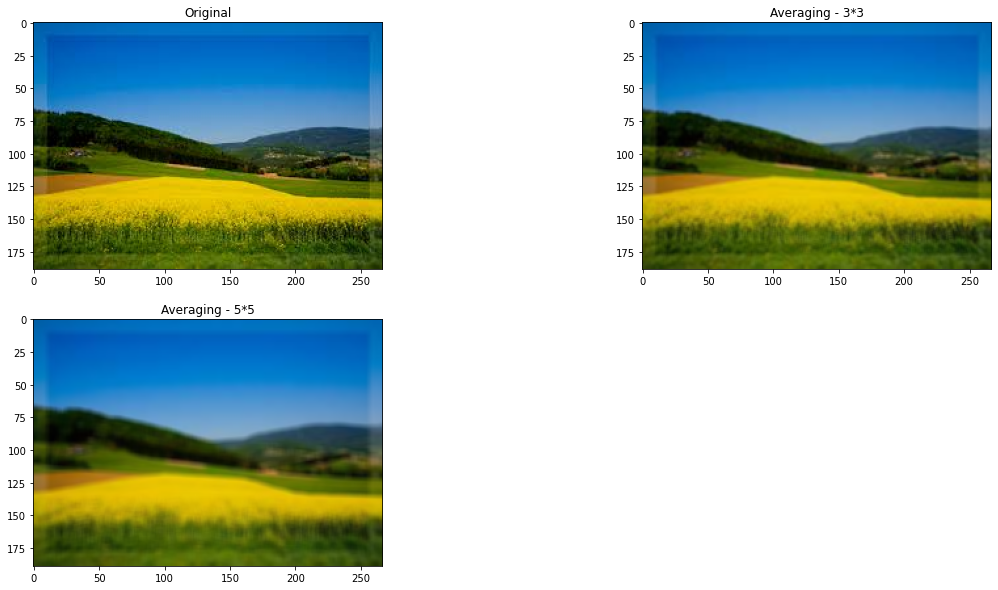

In [2]:
#1: filter size(3,3) and (5,5)

img = Image.open("image.jpg")

img = np.array(img)
kernel1 = np.ones((3,3),np.float32)/9
dst1 = cv2.filter2D(img,-1,kernel1)

kernel2 = np.ones((5,5),np.float32)/25
dst2 = cv2.filter2D(img,-1,kernel2)

plt.figure(figsize=(20,10))
plt.subplot(221),plt.imshow(img),plt.title('Original')
plt.subplot(222),plt.imshow(dst1),plt.title('Averaging - 3*3')
plt.subplot(223),plt.imshow(dst2),plt.title('Averaging - 5*5')
plt.show()

## Note: Here we can notice the more the filtering we apply the more averaging occurs and the image starts getting blurr

***Knowing the math behind the convolution***

In [3]:
def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

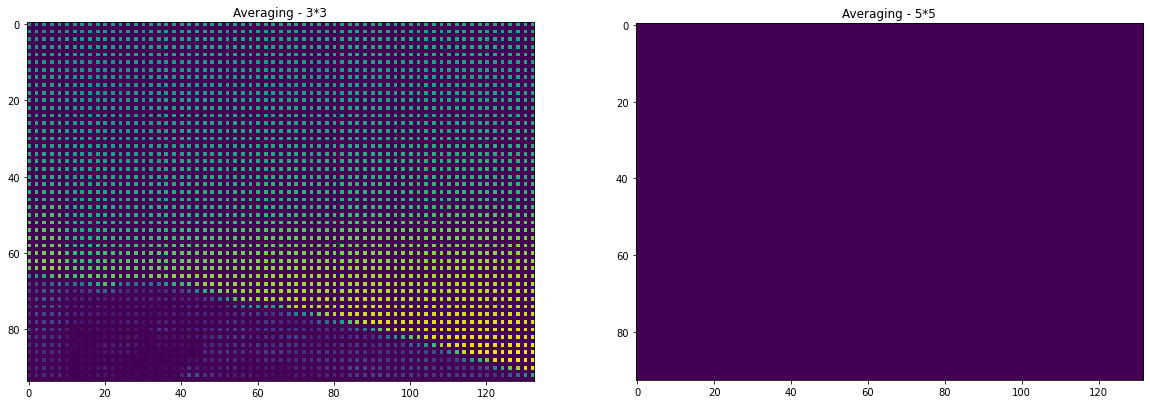

In [4]:
#2: filter size(3,3) and (5,5),stride=2
kernel1 = np.ones((3,3),np.float32)/9
kernel2 = np.ones((5,5),np.float32)/25
dst3 = convolve2D(img, kernel1, strides=2)
dst4 = convolve2D(img, kernel2, strides=2)

plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(dst3),plt.title('Averaging - 3*3')
plt.subplot(122),plt.imshow(dst4),plt.title('Averaging - 5*5')
plt.show()

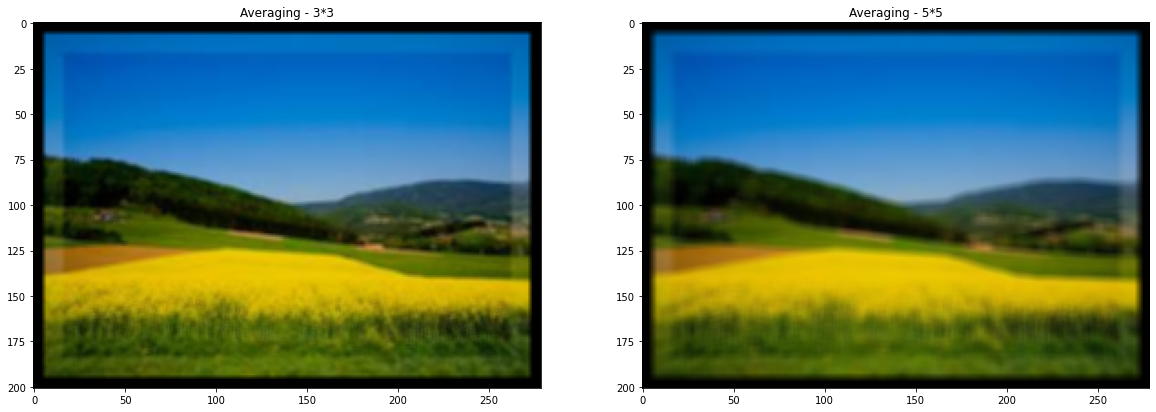

In [5]:
#3: filter size(3,3) and (5,5),stride=1,zero-padding

import cv2
import numpy as np
from matplotlib import pyplot as plt

from PIL import Image
img = Image.open("image.jpg")

img = np.array(img)
img = np.pad(img, pad_width=[(6, 6),(6, 6),(0, 0)], mode='constant')
kernel1 = np.ones((3,3),np.float32)/9
dst5 = cv2.filter2D(img,-1,kernel1)

kernel2 = np.ones((5,5),np.float32)/25
dst6 = cv2.filter2D(img,-1,kernel2)

plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(dst5),plt.title('Averaging - 3*3')
plt.subplot(122),plt.imshow(dst6),plt.title('Averaging - 5*5')
plt.show()

[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0. 75. ... 80.  0.  0.]
 ...
 [ 0.  0. 59. ... 64.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


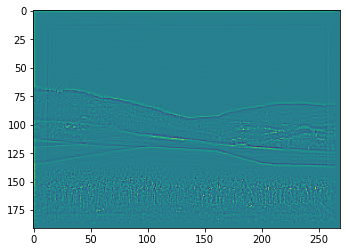

In [6]:
#Additional ---
def processImage(image): 
    image = cv2.imread(image) 
    image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY) 
    return image
image = processImage('image.jpg')

# Edge Detection Kernel
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
#kernel = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
#kernel = np.array([[2, 2, 2], [2, 2, 2], [2, 2, 2]])

# Convolve and Save Output
output = convolve2D(image, kernel, padding=2)
plt.imshow(output)

In [7]:
#4: Calculating image entropies
from numpy import unique
from scipy.stats import entropy as scipy_entropy

def entropy(image, base=2):
    _, counts = unique(image, return_counts=True)
    return scipy_entropy(counts, base=base)

print("Entropy of original image: ",entropy(img))
print("Entropy of dst1: ",entropy(dst1))
print("Entropy of dst2: ",entropy(dst2))
print("Entropy of dst3: ",entropy(dst3))
print("Entropy of dst4: ",entropy(dst4))
print("Entropy of dst5: ",entropy(dst5))
print("Entropy of dst6: ",entropy(dst6))
print("Entropy of output: ",entropy(output))

Entropy of original image:  6.759822700487794
Entropy of dst1:  7.4065184009049245
Entropy of dst2:  7.432785462154902
Entropy of dst3:  3.4584679467904973
Entropy of dst4:  0.0
Entropy of dst5:  7.05953508751348
Entropy of dst6:  7.166091852391013
Entropy of output:  7.202211715521415


## Here, we can see that entropy of 4th processed image is 0.